In [5]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.9 kB 330.3 kB/s eta 0:00:01
     --------------- --------------------- 71.7/165.9 kB 357.2 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 587.5 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 2.3 MB/s eta 0:00:04
    --------------------------------------- 0.2/8.0 MB 2.0 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.0 MB 2.1 MB/s eta 0:00:04
   -- --------------------

Spam Likelihood: 51.41414141414144%


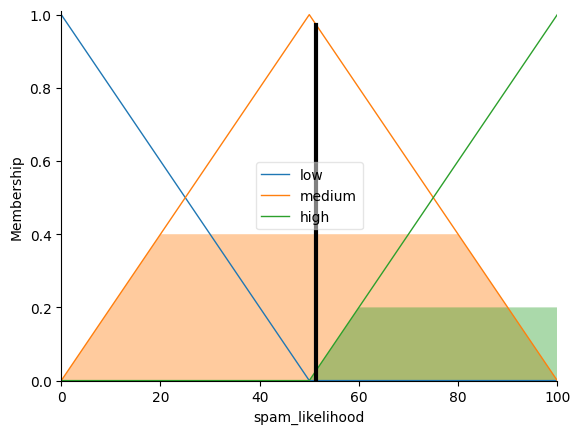

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

keyword_freq = ctrl.Antecedent(np.arange(0, 11, 1), 'keyword_freq')
num_links = ctrl.Antecedent(np.arange(0, 11, 1), 'num_links')
sender_reputation = ctrl.Antecedent(np.arange(0, 11, 1), 'sender_reputation')
spam_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'spam_likelihood')

keyword_freq['low'] = fuzz.trimf(keyword_freq.universe, [0, 0, 5])
keyword_freq['medium'] = fuzz.trimf(keyword_freq.universe, [0, 5, 10])
keyword_freq['high'] = fuzz.trimf(keyword_freq.universe, [5, 10, 10])

num_links['few'] = fuzz.trimf(num_links.universe, [0, 0, 5])
num_links['moderate'] = fuzz.trimf(num_links.universe, [0, 5, 10])
num_links['many'] = fuzz.trimf(num_links.universe, [5, 10, 10])

sender_reputation['poor'] = fuzz.trimf(sender_reputation.universe, [0, 0, 5])
sender_reputation['average'] = fuzz.trimf(sender_reputation.universe, [0, 5, 10])
sender_reputation['good'] = fuzz.trimf(sender_reputation.universe, [5, 10, 10])

spam_likelihood['low'] = fuzz.trimf(spam_likelihood.universe, [0, 0, 50])
spam_likelihood['medium'] = fuzz.trimf(spam_likelihood.universe, [0, 50, 100])
spam_likelihood['high'] = fuzz.trimf(spam_likelihood.universe, [50, 100, 100])

rule1 = ctrl.Rule(keyword_freq['high'] & num_links['many'] & sender_reputation['poor'], spam_likelihood['high'])
rule2 = ctrl.Rule(keyword_freq['medium'] & num_links['moderate'] & sender_reputation['average'], spam_likelihood['medium'])
rule3 = ctrl.Rule(keyword_freq['low'] & num_links['few'] & sender_reputation['good'], spam_likelihood['low'])

spam_control = ctrl.ControlSystem([rule1, rule2, rule3])
spam_simulation = ctrl.ControlSystemSimulation(spam_control)

spam_simulation.input['keyword_freq'] = 6
spam_simulation.input['num_links'] = 8
spam_simulation.input['sender_reputation'] = 3

spam_simulation.compute()
spam_score = spam_simulation.output['spam_likelihood']

print(f"Spam Likelihood: {spam_score}%")

spam_likelihood.view(sim=spam_simulation)

plt.savefig('spam_likelihood.png')

